In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from catboost import CatBoostClassifier

In [29]:
# Path to the folder containing CSV files
folder_path = 'CIC2017'

# List to hold DataFrames
dfs = []

# Loop through all files in the folder
for file in os.listdir(folder_path):
    print(file)
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        # Read the CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, low_memory=False)
        
        print(df.shape)
        #if file=='Ransomware-All.csv':
        #    continue
        dfs.append(df.iloc[:50000])
        print(len(dfs))

# Concatenate all DataFrames into a single DataFrame
print('concating')
df = pd.concat(dfs, ignore_index=True)

# Optionally, you can save the concatenated DataFrame to a new CSV file
#final_df.to_csv('combined_output.csv', index=False)

# Display the final DataFrame
print(df)


Adware-All.csv
(424147, 85)
1
Benign-All.csv
(1205515, 85)
2
Ransomware-All.csv
(348943, 85)
3
Scareware-All.csv
(400841, 85)
4
SMSmalware-All.csv
(237133, 85)
5
concating
                                       Flow ID      Source IP   Source Port  \
0        172.217.0.238-10.42.0.211-443-54819-6    10.42.0.211       54819.0   
1        172.217.1.170-10.42.0.211-443-51023-6    10.42.0.211       51023.0   
2        172.217.2.110-10.42.0.211-443-39805-6    10.42.0.211       39805.0   
3        172.217.2.110-10.42.0.211-443-39805-6    10.42.0.211       39805.0   
4        172.217.0.238-10.42.0.211-443-36040-6  172.217.0.238         443.0   
...                                        ...            ...           ...   
249995       10.42.0.211-10.42.0.1-25739-53-17    10.42.0.211       25739.0   
249996       10.42.0.211-10.42.0.1-10574-53-17    10.42.0.211       10574.0   
249997  172.217.12.136-10.42.0.211-443-52231-6    10.42.0.211       52231.0   
249998       10.42.0.211-10.42.0.1-561

In [31]:
set(df[' Label'].values)

{'ADWARE_DOWGIN',
 'ADWARE_EWIND',
 'BENIGN',
 'RANSOMWARE_CHARGER',
 'RANSOMWARE_SIMPLOCKER',
 'RANSOMWARE_SVPENG',
 'RANSOMWARE_WANNALOCKER',
 'SCAREWARE_ANDROIDDEFENDER',
 'SCAREWARE_AVFORANDROID',
 'SCAREWARE_AVPASS',
 'SCAREWARE_FAKETAOBAO',
 'SCAREWARE_VIRUSSHIELD',
 'SMSMALWARE_FAKEMART',
 'SMSMALWARE_NANDROBOX',
 'SMSMALWARE_PLANKTON',
 'SMSMALWARE_SMSSNIFFER',
 nan}

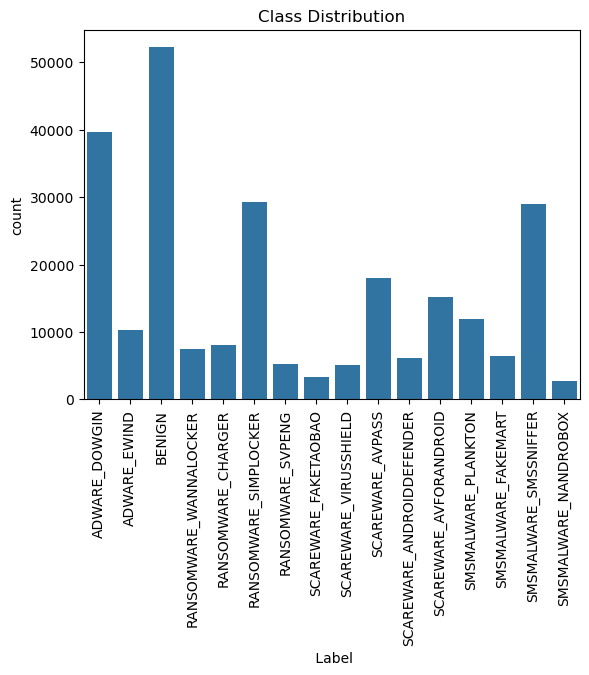

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=' Label', data=df)  # Replace 'class_column' with the label column
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


In [49]:
df.shape

(250000, 85)

In [51]:
#we will keep only the general categories here
df['Label'] = df[' Label'].str.split('_').str[0]
#df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

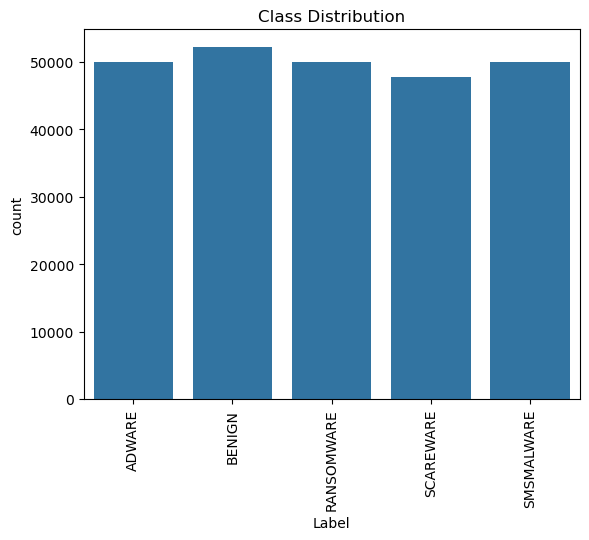

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Label', data=df)  # Replace 'class_column' with the label column
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.isnull().sum()

In [ ]:
#data preprocessing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
df = df.drop_duplicates(keep='first')

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
np.unique(df['Label'])

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Label', data=df)  # Replace 'class_column' with the label column
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Check the distribution of malware labels (if present)
if 'Label' in df.columns:
    print(df['Label'].value_counts())

In [ ]:
#df.to_excel('bot_attacks.xlsx', index=False) 

In [ ]:
print(df.columns)


In [ ]:
# Filter the data to focus on apps with potentially harmful permissions
#'MODIFY_PHONE_STATE','SEND_SMS', 'WRITE_EXTERNAL_STORAGE', 'CAMERA', 'RECORD_AUDIO', 'ACCESS_FINE_LOCATION'
#malicious_permissions = [Bwd Packet Length Min ]
malicious_apps = df[df[' Source Port']>60000]['Label']

# Show how many apps have these permissions
#print(f"Number of apps with potentially malicious behavior: {(malicious_apps)}")
# Count class distribution
class_distribution = malicious_apps.value_counts()

# Display the distribution
print(class_distribution)



In [ ]:
grouped_data = df.groupby(' Source IP').agg({
    'Flow Bytes/s': ['mean', 'std'],
    ' Flow Packets/s': ['mean', 'std'],
    ' Total Fwd Packets': 'sum',
    ' Total Backward Packets': 'sum',
    # Add other features as needed
}).reset_index()

# Rename columns for readability
grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values]


In [ ]:
# Group data by Source IP and aggregate relevant features along with labels
grouped_data = df.groupby(' Source IP').agg({
    'Flow Bytes/s': ['mean', 'std'],
    ' Flow Packets/s': ['mean', 'std'],
    ' Total Fwd Packets': 'sum',
    ' Total Backward Packets': 'sum',
    'Label': ['count', lambda x: (x != 'BENIGN').sum(), lambda x: (x != 'BENIGN').mean()]
}).reset_index()

# Rename columns for better readability
grouped_data.columns = [
    ' Source IP', 
    'Flow Bytes/s Mean', 'Flow Bytes/s Std',
    ' Flow Packets/s Mean', 'Flow Packets/s Std',
    ' Total Fwd Packets', 'Total Backward Packets',
    ' Total Flows', 'Malicious Flows Count', 'Malicious Flows Percentage'
]

# Display the resulting DataFrame
filtered_data = grouped_data[
    (grouped_data['Flow Packets/s Std'].notna()) &  # Check for non-NaN values
    (grouped_data['Flow Packets/s Std'] >= 1000)   # Check for values >= 1000
]

# Display the filtered results
filtered_data.head(n=50)


In [ ]:
grouped_data.head()

In [ ]:
# Group data by Source IP and aggregate relevant features along with labels
grouped_data_time = df.groupby(' Timestamp').agg({
    'Flow Bytes/s': ['mean', 'std'],
    ' Flow Packets/s': ['mean', 'std'],
    ' Total Fwd Packets': 'sum',
    ' Total Backward Packets': 'sum',
    'Label': ['count', lambda x: (x != 'BENIGN').sum(), lambda x: (x != 'BENIGN').mean()]
}).reset_index()

# Rename columns for better readability
grouped_data_time.columns = [
    ' Timestamp', 
    'Flow Bytes/s Mean', 'Flow Bytes/s Std',
    ' Flow Packets/s Mean', 'Flow Packets/s Std',
    ' Total Fwd Packets', 'Total Backward Packets',
    ' Total Flows', 'Malicious Flows Count', 'Malicious Flows Percentage'
]





In [ ]:
# Filter rows where 'Malicious Flows Percentage' is 0 and 'Malicious Flows Count' > 10
filtered_data = grouped_data_time[
    (grouped_data_time['Malicious Flows Percentage'] == 1.0) & 
    (grouped_data_time['Malicious Flows Count'] > 10)
]

# Display the filtered DataFrame
filtered_data.head(n=50)


In [ ]:
# Filter rows where 'Malicious Flows Percentage' is 0
filtered_data = grouped_data_time[grouped_data_time['Malicious Flows Percentage'] == 0]

# Display the filtered DataFrame
filtered_data.head(n=50)

In [ ]:
# Check the distribution of malware labels (if present)
if 'Label' in df.columns:
    print(df['Label'].value_counts())


In [ ]:
# Initialize and train CatBoostClassifier
X =  df.drop(columns=['Label',' Label',' Flow IAT Min',' Packet Length Std',' CWE Flag Count',' Down/Up Ratio','Fwd Avg Bytes/Bulk'])  # Replace with your feature columns
y = df['Label']   # Replace with your target column


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Select only the numerical columns from the DataFrame

# Assuming df is your dataframe
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'string':
        X[col] = X[col].astype(str)
        X[col] = label_encoder.fit_transform(X[col])
y = df['Label']  # The target column 'Label'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
def create_feature_importance(model,model_name="Decision Tree"):
    model.fit(X, y)
    # Get feature importance
    if model_name == "Logistic Regression":
        feature_importance =  model.coef_[0]
    else:
        feature_importance = model.feature_importances_

    # Create a DataFrame to store feature names and their corresponding importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importance
    })

    # Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot top 10 most important features
    top_10_features = feature_importance_df.head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importance for '+model_name)
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.savefig('top_10_features_'+model_name+'.png', bbox_inches='tight')  # Save the figure
    plt.show()
    return top_10_features
def plot_conf_matrix(y_test, y_pred,model_name="Decision Tree"):
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    classes=list(set(y_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for '+model_name)
    plt.savefig('ConfusionMatrix_'+model_name+'.png', bbox_inches='tight')  # Save the figure
    plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
model = DecisionTreeClassifier(max_depth=4,random_state=0)
top_10 = create_feature_importance(model,model_name="Decision Tree")
top_10 = top_10['Feature'].values
X_train_dt = X_train[top_10]
X_test_dt = X_test[top_10]

In [ ]:

import time
from datetime import timedelta

# Start timer for training
time1 = time.time()

# Train the model
model.fit(X_train_dt, y_train)

# Stop timer after training
time2 = time.time()

# Make predictions
y_pred = model.predict(X_test_dt)

# Stop timer after testing
time3 = time.time()

# Calculate training and testing times
train_time = time2 - time1
test_time = time3 - time2

# Output the time taken for training and testing
print("Train time:", str(timedelta(seconds=train_time)))
print("Test time:", str(timedelta(seconds=test_time)))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Display the results
print(f" DT Accuracy: {accuracy:.4f}")
print(f"DT Precision: {precision:.4f}")
print(f"DT Recall: {recall:.4f}")
print(f"DT F1-Score: {f1:.4f}")


In [ ]:
plot_conf_matrix(y_test, y_pred,model_name="Decision Tree")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Decision Tree model
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
top_10 = create_feature_importance(model,model_name="Random Forest")
top_10 = top_10['Feature'].values


In [ ]:

import time
from datetime import timedelta

# Create a Random Forest model 

X_train_rf = X_train[top_10]
X_test_rf = X_test[top_10]


# Start timer for training
time1 = time.time()


# Train the model
model.fit(X_train_rf, y_train)

# Stop timer after training
time2 = time.time()

# Make predictions
y_pred = model.predict(X_test_rf)

# Stop timer after testing
time3 = time.time()

# Calculate training and testing times
train_time = time2 - time1
test_time = time3 - time2

# Output the time taken for training and testing
print("train time is ", str(timedelta(seconds=train_time)))
print("test time is ", str(timedelta(seconds=test_time)))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Display the results
print(f" RF Accuracy: {accuracy:.4f}")
print(f"RF Precision: {precision:.4f}")
print(f"RF Recall: {recall:.4f}")
print(f"RF F1-Score: {f1:.4f}")


In [ ]:
plot_conf_matrix(y_test, y_pred,model_name="Random Forest")

In [ ]:
from sklearn.linear_model import LogisticRegression
import time
from datetime import timedelta

# Create a Logistic Regression model 

model = LogisticRegression(max_iter=200, random_state=42)

top_10 = create_feature_importance(model,model_name="Logistic Regression")
top_10 = top_10['Feature'].values
X_train_lr = X_train[top_10]
X_test_lr = X_test[top_10]

# Start timer for training
time1 = time.time()



# Train the model
model.fit(X_train_lr, y_train)

# Stop timer after training
time2 = time.time()

# Make predictions
y_pred = model.predict(X_test_lr)

# Stop timer after testing
time3 = time.time()

# Calculate training and testing times
train_time = time2 - time1
test_time = time3 - time2

# Output the time taken for training and testing
print("train time is ", str(timedelta(seconds=train_time)))
print("test time is ", str(timedelta(seconds=test_time)))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Display the results
print(f" LR Accuracy: {accuracy:.4f}")
print(f"LR Precision: {precision:.4f}")
print(f"LR Recall: {recall:.4f}")
print(f"LR F1-Score: {f1:.4f}")


In [ ]:
plot_conf_matrix(y_test, y_pred,model_name="Logistic Regression")